## <b> Importing Libraries

In [1]:
# Pandas for dataframe manipulation
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import time
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

import time
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Dropout
from keras.models import Model, load_model

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import pydot

Using TensorFlow backend.


## <b> Loading Data

In [2]:
# Keeping the columns names to load it correctly on dataframe
ratings_title = ['user_id', 'movie_id', 'rating', 'date']

# Dataframe of rating data
ratings = pd.read_csv('ratings.dat', sep='::', header=None, names=ratings_title, engine = 'python')

## <b> Informations about the Data

In [3]:
# Rows and Cols 
print(ratings.shape)

(1000209, 4)


In [4]:
# Visualizing the first 5 columns
ratings.head()

,user_id,movie_id,rating,date
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
# Visualizing the last 5 columns
ratings.tail()

,user_id,movie_id,rating,date
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [6]:
# Statistics
ratings.describe()

,user_id,movie_id,rating,date
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [7]:
# Visualizng the information of data types, sizes...
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id     1000209 non-null int64
movie_id    1000209 non-null int64
rating      1000209 non-null int64
date        1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [8]:
# Drop the date column
ratings = ratings.drop('date', axis = 1)

In [9]:
ratings.head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


## <b> Exploratory Data Analysis

#### <b> Searching for missing values

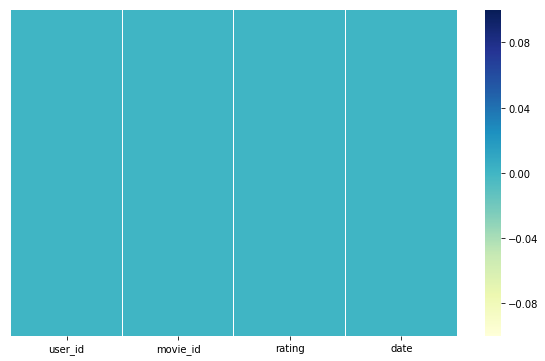

In [10]:
# Missing data on Heatmap (for a clean visualization)
plt.figure(figsize = (10,6))
sea.heatmap(ratings.isnull(),yticklabels=False,cbar=True,cmap='YlGnBu')
plt.save('missing_values.png')

<b> Solid color indicates no missing values

#### <b> Data Visualization

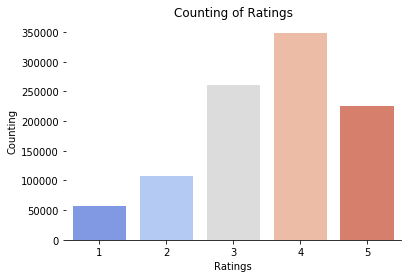

In [25]:
# Counting of rating 
sea.countplot(x='rating',data=ratings, palette='coolwarm')
plt.xlabel("Ratings")
plt.ylabel("Counting")
plt.title("Counting of Ratings")
plt.savefig('Counting_Ratings.png')
sea.despine(left=True)

## <b> Predicting Ratings using Neural Network

#### Encoding Categorical Data

In [8]:
ratings.user_id = ratings.user_id.astype('category').cat.codes.values
ratings.movie_id = ratings.movie_id.astype('category').cat.codes.values

#### Creating the Utility Matrix

We're creating a matrix full of nan values, that corresponds to not rated movies 

In [9]:
# Looking for some information about data
users = len(ratings['user_id'].unique())
movies = len(ratings['movie_id'].unique())
matrix = users * movies
print(" Ratings shape = ", ratings.shape, "\n\n", 
      "Total of users = ", users, "\n\n", 
      "Total of movies = ", movies, "\n\n",
     "Size of the Matrix =", matrix)

 Ratings shape =  (1000209, 4) 

 Total of users =  6040 

 Total of movies =  3706 

 Size of the Matrix = 22384240


In [10]:
# Matrix organization
index=list(ratings['user_id'].unique())
columns=list(ratings['movie_id'].unique())
index=sorted(index)
columns=sorted(columns)

In [11]:
# Creating the new dataframe (user-item rating matrix)
data = pd.pivot_table(data=ratings,values='rating',index='user_id',columns='movie_id')

In [12]:
# Looking the data
data.head()

movie_id,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
user_id,,,,,,,,,,,,,,,,,,,,,
0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# replace nan values for 0 (not rated movies)
data = data.replace(np.nan, 0)

In [222]:
# Looking the data
data.head()

movie_id,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
user_id,,,,,,,,,,,,,,,,,,,,,
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Split data in test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings, test_size=0.1)

In [15]:
print(train.shape, test.shape)

(900188, 4) (100021, 4)


In [16]:
print(users, movies)

6040 3706


## <b> Input, Embeddings and Dot Product 

In [18]:
user_input = Input(shape = (1,), name='user_input', dtype='int64')
user_embedding = Embedding(users, 50, name='user_embedding')(user_input)
user_vec = Flatten(name = 'flatten_users')(user_embedding)
user_vec = Dropout(0.40)(user_vec)

In [19]:
item_input = Input(shape = (1,), name = 'movie_input', dtype = 'int64')
item_embedding = Embedding(movies, 50, name = 'movie_embedding')(item_input)
item_vec = Flatten(name = 'flatten_movie')(item_embedding)
item_vec = Dropout(0.40)(item_vec)

In [20]:
# Multiplies the movie vector by the user vector
product = Dot(name = "Dot_Product", axes = 1)([item_vec, user_vec])

## <b>Neural Network Configuration

In [21]:
# Configuring a fully connected neural network
# 96 input neurons, activation relu (), weight initializer (random)
values = Dense(96, activation = 'relu', kernel_initializer = 'random_uniform')(product)
values = Dropout(0.4)(values)
values = Dense(1, activation = 'relu')(values)
my_model = keras.models.Model([user_input, item_input], values)
my_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
movie_input (InputLayer)        (None, 1)            0                                            
__________________________________________________________________________________________________
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
movie_embedding (Embedding)     (None, 1, 50)        185300      movie_input[0][0]                
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 50)        302000      user_input[0][0]                 
__________________________________________________________________________________________________
flatten_mo

## <b> Structure Visualization

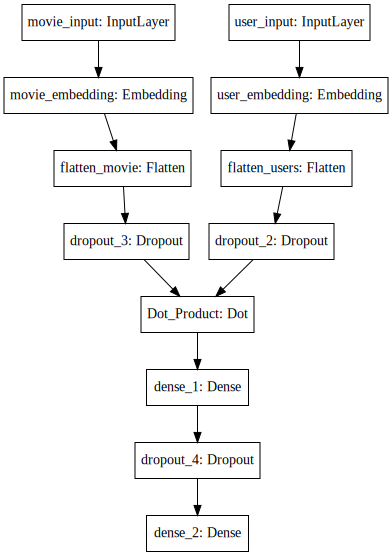

In [22]:
SVG(model_to_dot(my_model).create(prog='dot', format='svg'))

## <b> Applying the Model

In [24]:
# Compile with adam optimizer and mean square error 
my_model.compile(optimizer=Adam(lr=0.001), loss='mse', metrics=['mse', 'accuracy'])

In [25]:
# Organize train and test values
X_train = [train.user_id, train.movie_id]
y_train = [train.rating]
X_test = [test.user_id, test.movie_id]
y_test = [test.rating]

In [26]:
# Running the models (1000 data samples in 100 times)
History = my_model.fit(X_train, y_train, batch_size=1000, epochs = 100, 
                       validation_data = (X_test,y_test),verbose = 1)

W0714 12:46:24.062183 140719129151296 deprecation_wrapper.py:119] From /home/carycccs/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 900188 samples, validate on 100021 samples
Epoch 1/100
900188/900188 [==============================] - 9s 10us/step - loss: 2.5959 - mean_squared_error: 2.5959 - acc: 0.2611 - val_loss: 1.2236 - val_mean_squared_error: 1.2236 - val_acc: 0.3481
Epoch 2/100
900188/900188 [==============================] - 8s 9us/step - loss: 1.1691 - mean_squared_error: 1.1691 - acc: 0.3497 - val_loss: 0.8649 - val_mean_squared_error: 0.8649 - val_acc: 0.4002
Epoch 3/100
900188/900188 [==============================] - 7s 8us/step - loss: 1.0092 - mean_squared_error: 1.0092 - acc: 0.3790 - val_loss: 0.8155 - val_mean_squared_error: 0.8155 - val_acc: 0.4176
Epoch 4/100
900188/900188 [==============================] - 8s 9us/step - loss: 0.9577 - mean_squared_error: 0.9577 - acc: 0.3897 - val_loss: 0.7971 - val_mean_squared_error: 0.7971 - val_acc: 0.4245
Epoch 5/100
900188/900188 [==============================] - 8s 9us/step - loss: 0.9185 - mean_squared_error: 0.9185 - acc: 0.3978 - val_loss: 

# <b> Results

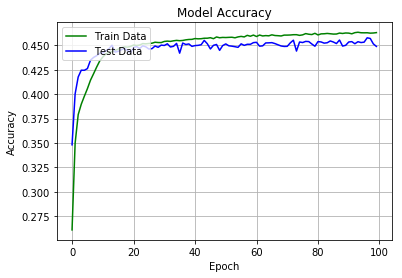

In [27]:
plt.plot(History.history['acc'] , 'g')
plt.plot(History.history['val_acc'] , 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Data', 'Test Data'], loc='upper left')
plt.grid(True)
plt.savefig('ModelAccuracy.png')
plt.show()

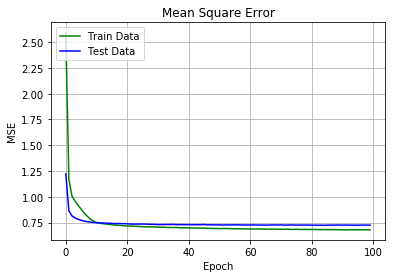

In [28]:
plt.plot(History.history['mean_squared_error'] , 'g')
plt.plot(History.history['val_mean_squared_error'] , 'b')
plt.title('Mean Square Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train Data', 'Test Data'], loc='upper left')
plt.grid(True)
plt.savefig('ModelLoss.png')
plt.show()

# <b> Visualizing Predictions x Real values

In [29]:
# Generating predictions based on the train data
predicted = my_model.predict([test.user_id,test.movie_id])
# Storing real data
real = test.rating

In [30]:
# Create a dataframe to organize data 
results_data = pd.DataFrame()

In [31]:
# Insert real and predicted value on dataframe
results_data['Real'] = real
results_data['Predicted'] = predicted

In [32]:
# Compare real value with predicted value
results_data.head(10)

,Real,Predicted
596634,4,3.700482
413400,3,4.195309
6516,3,2.645268
479057,4,3.042789
458727,3,3.374344
799623,3,3.163341
754973,4,3.860578
463420,2,2.290428
237095,4,3.101619
390380,3,2.913085
